In [152]:
#Regression models to predict expenses of patients.

In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, classification_report
from scipy.stats import uniform
from sklearn.decomposition import PCA


In [154]:
filepath = "breast_regression.csv"
df = pd.read_csv(filepath)


In [155]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [156]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [157]:
#check for missing values
df.isna().sum()
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [158]:
#check for duplicates
df.duplicated().sum()

np.int64(1)

In [159]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [160]:
#I am not dropping any columns as all columns seem important to me

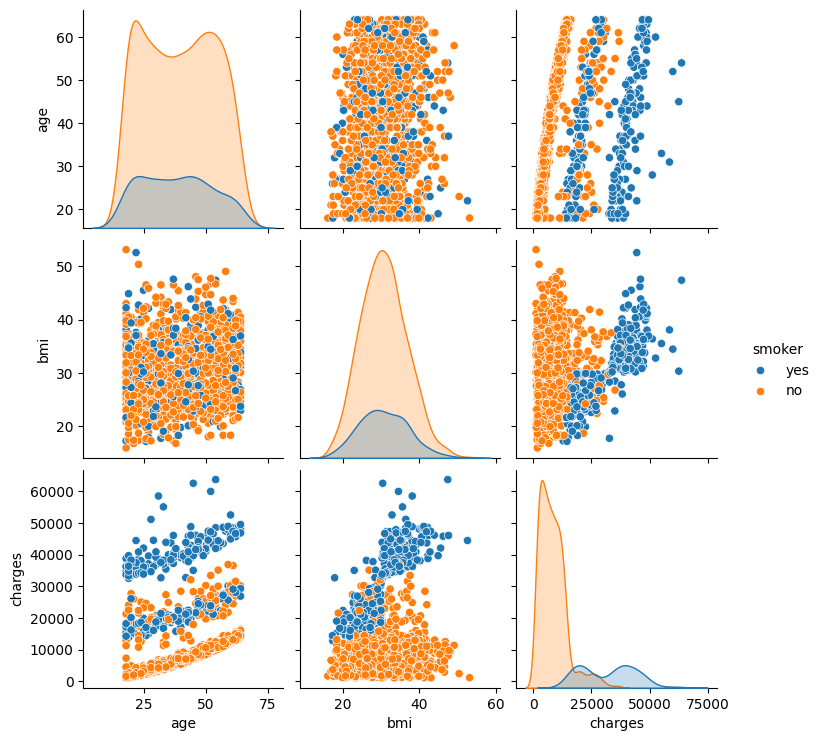

In [161]:
#pairplots
sns.pairplot(df[['age', 'bmi', 'charges', 'smoker']], hue='smoker')

<Axes: xlabel='charges', ylabel='Count'>

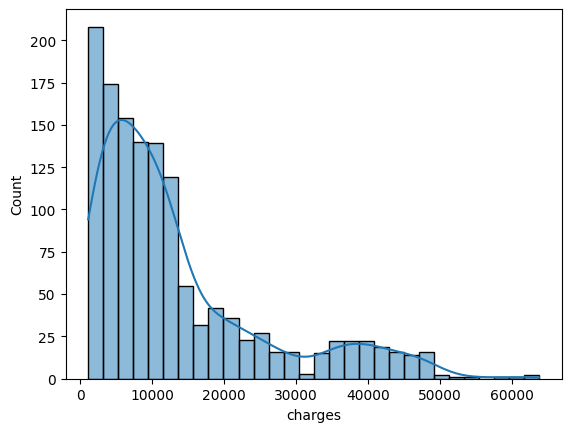

In [162]:
sns.histplot(df['charges'], kde=True)

<Axes: xlabel='children', ylabel='charges'>

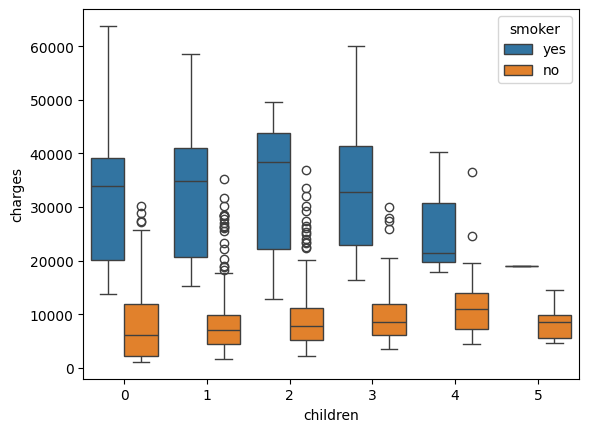

In [163]:
#plots
sns.boxplot(x='children', y='charges', hue ='smoker',data=df)


<Axes: xlabel='region', ylabel='count'>

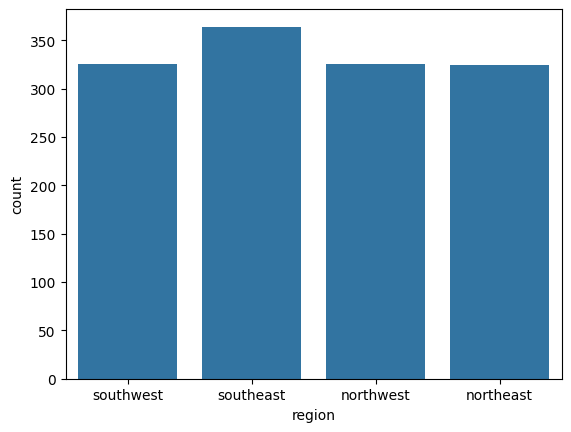

In [164]:
#add count plot
sns.countplot(x='region', data=df)

In [165]:
#label encoding
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
#one hot encoding
df = pd.get_dummies(df, columns=['region'], dtype='int')


#**start from here**

In [166]:
df.head(6)

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
5,31,0,25.740,0,0,3756.62160,0,0,1,0


<Axes: >

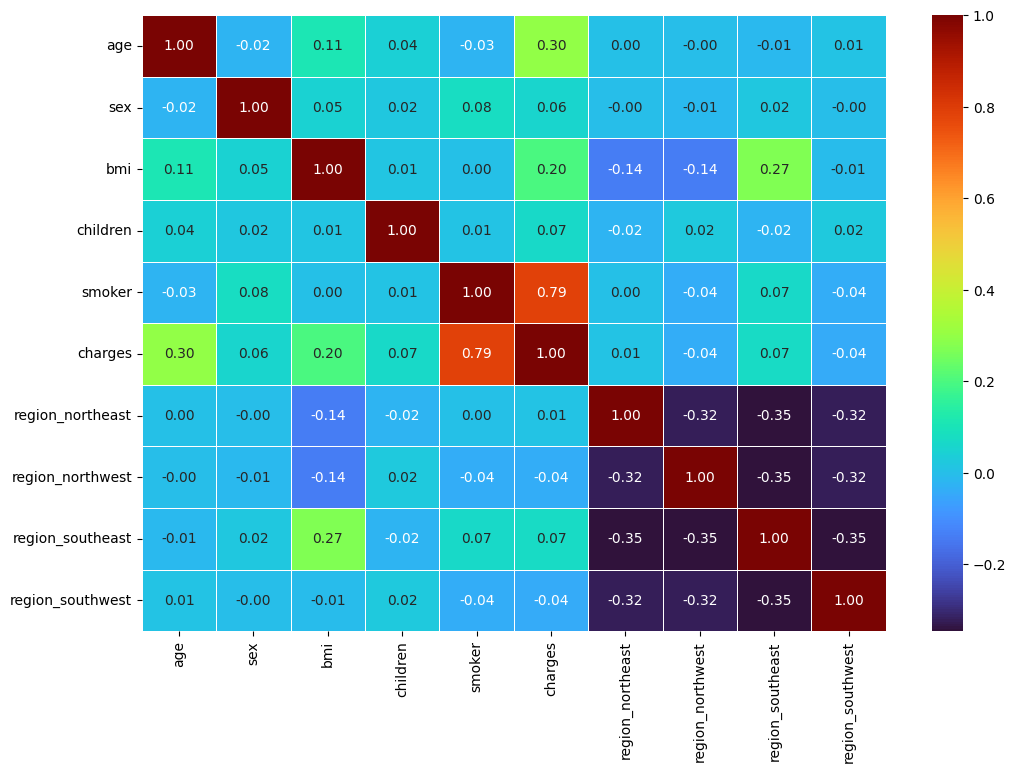

In [167]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="turbo", fmt= ".2f", linewidth=0.5)

In [168]:
#Split and scale the data
X = df.drop('charges', axis=1).values
y = df['charges'].values

In [200]:
X_train, X_val, y_train, y_val =train_test_split(X,y, test_size = 0.2, random_state = 42)
X_val, X_test, y_val, y_test =train_test_split(X_val,y_val, test_size = 0.5, random_state = 42)

In [206]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [207]:
#Decision Tree
DecisionTree = DecisionTreeRegressor(random_state=42)
DecisionTree.fit(X_train, y_train)
y_pred = DecisionTree.predict(X_test)
print("mean absolute error: ", mean_absolute_error(y_test, y_pred))
print("mean square error:", mean_squared_error(y_test, y_pred))
print("r2 score:", r2_score(y_test, y_pred))


mean absolute error:  3250.8861744776127
mean square error: 43279159.967223294
r2 score: 0.7413765426804309


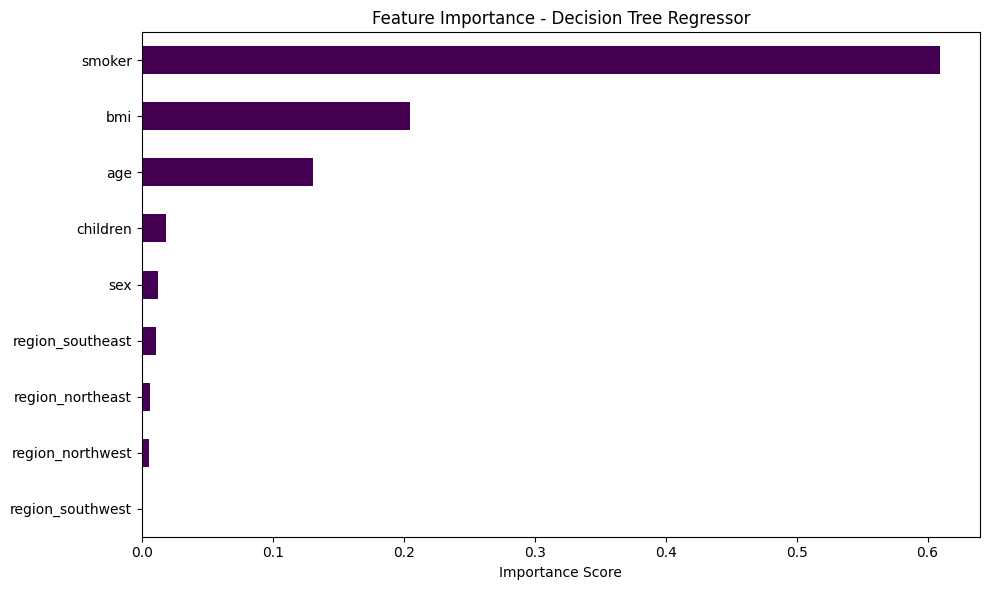

In [208]:
# Get feature importances
importances = DecisionTree.feature_importances_
feature_names = ['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']

# Create a DataFrame for visualization
feat_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
feat_importances.plot(kind='barh', colormap='viridis')
plt.title('Feature Importance - Decision Tree Regressor')
plt.gca().invert_yaxis()
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

In [236]:
#retrain the model with the most important features from the decision tree
most_important_features = df[['smoker','bmi','age']]
X1 = most_important_features.values
y1 = df['charges'].values
X1_train, X1_val, y1_train, y1_val =train_test_split(X1,y1, test_size = 0.2, random_state = 42)
X1_val, X1_test, y1_val, y1_test =train_test_split(X1_val,y1_val, test_size = 0.5, random_state = 42)

#Decision Tree
DecisionTree = DecisionTreeRegressor(random_state=42)
DecisionTree.fit(X1_train, y1_train)
y1_pred = DecisionTree.predict(X1_test)
print("mean absolute error: ", mean_absolute_error(y1_test, y1_pred))
print("mean square error:", mean_squared_error(y1_test, y1_pred))
print("r2_dt:", r2_score(y1_test, y1_pred))


mean absolute error:  2870.085839626866
mean square error: 34096952.01983922
r2_dt: 0.7962467011349423


In [239]:
#Random Forest
RandomForest = RandomForestRegressor(random_state=42, n_estimators=100)
RandomForest.fit(X_train, y_train)
y_pred_rf = RandomForest.predict(X_test)
print("mean absolute error: ", mean_absolute_error(y_test, y_pred_rf))
print("mean square error:", mean_squared_error(y_test, y_pred_rf))
print("r2_rf:", r2_score(y_test, y_pred_rf))



mean absolute error:  2585.275698066108
mean square error: 21579725.11632977
r2_rf: 0.8710459463210969


In [ ]:
#I trained the random forest model with the most important features and did not achive a better score than decision tree
# with important features =  0.856 
# with all features = 0.871

In [ ]:
#SVR
SVR_model = SVR()
SVR_model.fit(X_train, y_train)
y_pred_svr = SVR_model.predict(X_test)
print("mean absolute error: ", mean_absolute_error(y_test, y_pred_svr))
print("mean square error:", mean_squared_error(y_test, y_pred_svr))
print("r2_svr:", r2_score(y_test, y_pred_svr))


mean absolute error:  9211.075304742555
mean square error: 182036467.80861834
r2_svr: -0.08779608242308057


In [214]:
# Hyperparameter tuning for SVR using GridSearchCV
# Set the hyperparameter grid
param_grid = {
    'C': [5, 10, 100],
    'kernel': ['linear', 'poly', 'rbf'],
    'epsilon': [0.01, 0.1, 0.2]
}

# Perform grid search
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best model
best_svr = grid_search.best_estimator_

# Predict and validate on validation set
y_pred_val_svr = best_svr.predict(X_val)
print("Mean Absolute Error: ", mean_absolute_error(y_val, y_pred_val_svr))
print("Mean Squared Error: ", mean_squared_error(y_val, y_pred_val_svr))
print("R² score: ", r2_score(y_val, y_pred_val_svr))

Mean Absolute Error:  3536.9453578120497
Mean Squared Error:  51502220.56488816
R² score:  0.6388366157547234


In [ ]:
#different kernels 
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    SVR_model = SVR(kernel=kernel)
    SVR_model.fit(X_train, y_train)
    y_pred_svr = SVR_model.predict(X_val)
    print(f"Kernel: {kernel}")
    print("mean absolute error: ", mean_absolute_error(y_val, y_pred_val_svr))
    print("mean square error:", mean_squared_error(y_val, y_pred_val_svr))
    print("r2_svr:", r2_score(y_val, y_pred_val_svr))

Kernel: linear
mean absolute error:  3536.9453578120497
mean square error: 51502220.56488816
r2_svr: 0.6388366157547234
Kernel: poly
mean absolute error:  3536.9453578120497
mean square error: 51502220.56488816
r2_svr: 0.6388366157547234
Kernel: rbf
mean absolute error:  3536.9453578120497
mean square error: 51502220.56488816
r2_svr: 0.6388366157547234
Kernel: sigmoid
mean absolute error:  3536.9453578120497
mean square error: 51502220.56488816
r2_svr: 0.6388366157547234


In [219]:
#Using RandomizedSearchCV for hyperparameter tuning of SVR
param_distributions = {
    'C': uniform(1, 100),
    'epsilon': uniform(0.01, 1),
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf']
}
random_search = RandomizedSearchCV(SVR(), param_distributions, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)
y_pred_svr = SVR_model.predict(X_val)
print(f"Kernel: {kernel}")
print("mean absolute error: ", mean_absolute_error(y_val, y_pred_val_svr))
print("mean square error:", mean_squared_error(y_val, y_pred_val_svr))
print("r2_svr:", r2_score(y_val, y_pred_val_svr))

Kernel: sigmoid
mean absolute error:  3536.9453578120497
mean square error: 51502220.56488816
r2_svr: 0.6388366157547234


In [223]:
#PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # keep 95% of variance
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)

In [ ]:
# check how many components it kept
print("Number of components:", pca.n_components_)

Number of components: 8


In [225]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    SVR_model = SVR(kernel=kernel)
    SVR_model.fit(X_train_pca, y_train)
    y_pred_val_svr_pca = SVR_model.predict(X_val_pca)
    print(f"Kernel: {kernel}")
    print("mean absolute error: ", mean_absolute_error(y_val, y_pred_val_svr_pca))
    print("mean square error:", mean_squared_error(y_val, y_pred_val_svr_pca))
    print("r2_svr:", r2_score(y_val, y_pred_val_svr_pca))

Kernel: linear
mean absolute error:  7482.190492096744
mean square error: 137973553.2820241
r2_svr: 0.032449574151870886
Kernel: poly
mean absolute error:  8018.556067751633
mean square error: 150079387.8425253
r2_svr: -0.05244354562100351
Kernel: rbf
mean absolute error:  8020.202650278433
mean square error: 150303855.17335656
r2_svr: -0.05401764048461
Kernel: sigmoid
mean absolute error:  7989.866046636716
mean square error: 149457101.7559258
r2_svr: -0.04807971535232869


After all hypertuning the best SVR model produced r2_score of 0.6388366157547234

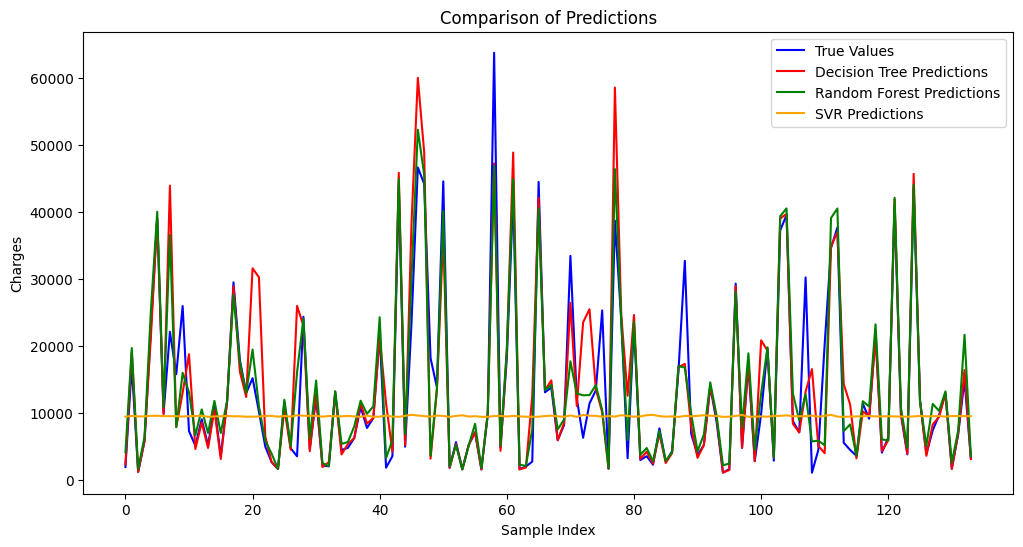

In [226]:
#plot the different results from random forest, decision tree and SVR
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='True Values', color='blue')
plt.plot(y_pred, label='Decision Tree Predictions', color='red')
plt.plot(y_pred_rf, label='Random Forest Predictions', color='green')
plt.plot(y_pred_svr, label='SVR Predictions', color='orange')
plt.title('Comparison of Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Charges')
plt.legend()
plt.show()

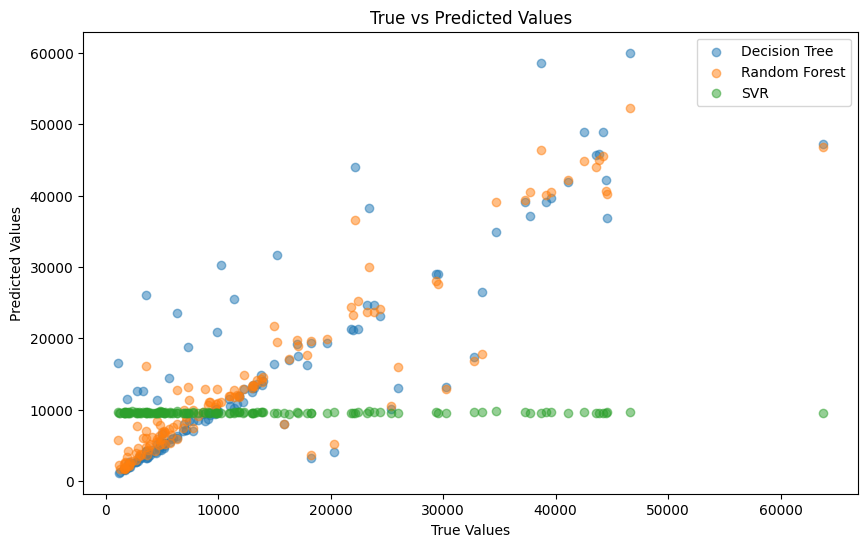

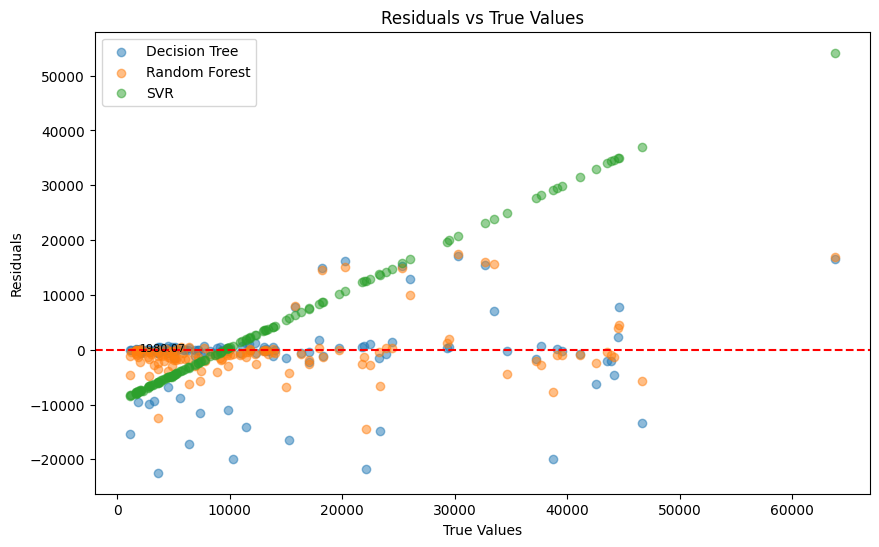

In [ ]:
#use scatter plot to visualize the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label='Decision Tree', alpha=0.5)
plt.scatter(y_test, y_pred_rf, label='Random Forest', alpha=0.5)
plt.scatter(y_test, y_pred_svr, label='SVR', alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()
#plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test - y_pred, label='Decision Tree', alpha=0.5)
plt.scatter(y_test, y_test - y_pred_rf, label='Random Forest', alpha=0.5)
plt.scatter(y_test, y_test - y_pred_svr, label='SVR', alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residuals vs True Values')
plt.legend()
plt.show()

Residuals are the differences between the actual value and the predicted value of your target variable.
Small residual means Model predicted close to actual
Large residual means  Model made a big error
Residual = 0	means Perfect prediction

Based on all three models, RandomForest performed well 